## Main Goal
The goal of this is to use various factors to predict obesity risk in individuals, which is a major risk factor for cardiovascular disease. Obesity is a complex condition that is influenced by a variety of factors, including genetics, diet, physical activity, and socioeconomic status. By developing a model that can accurately predict obesity risk, we can help to identify individuals who are at high risk for developing obesity and cardiovascular disease. This information can then be used to develop targeted interventions to prevent obesity and its associated complications

## Information about the Dataset

1.1 Import Libraries¶


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

1.2 Import Data¶


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Data Science/Multi-Class Obesity Risk/train.csv')

In [ ]:
data_test =pd.read_csv('/content/drive/MyDrive/Data Science/Multi-Class Obesity Risk/test.csv')

In [ ]:
#The Shape of the Data
print(f'The Train dataset has {data_train.shape[0]} rows and {data_train.shape[1]} columns')
print(f'The Test dataset has {data_test.shape[0]} rows and {data_test.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


1.3 Data Exploratory¶ (Quick overview)


In [ ]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
data_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data_test.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.00000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.00000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.27374,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.00000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation
13839,34597,Male,26.490926,1.812259,120.980508,yes,yes,2.744994,3.00000,Sometimes,no,2.205977,no,1.304291,0.630866,Sometimes,Public_Transportation


1.4 Data Summary¶




In [ ]:
data_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data_test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
data_test.duplicated().sum()

0

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


About Data:
• The train dataset contains 20758 rows and 18 columns
• There are no missing or duplicate values in any of the columns.
• Target Variable - Obesity Classification

1.5 Data Transforimng¶


In [ ]:
#Transform Data from obj to numerical in the train data
La = LabelEncoder()

In [ ]:
train_obj = data_train.select_dtypes(include = 'object')
train_numeric = data_train.select_dtypes(exclude = 'object')


In [ ]:
for i in range(0,train_obj.shape[1]):
  train_obj.iloc[: , i]= La.fit_transform(train_obj.iloc[: , i])

In [ ]:
train_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          20758 non-null  int64
 1   family_history_with_overweight  20758 non-null  int64
 2   FAVC                            20758 non-null  int64
 3   CAEC                            20758 non-null  int64
 4   SMOKE                           20758 non-null  int64
 5   SCC                             20758 non-null  int64
 6   CALC                            20758 non-null  int64
 7   MTRANS                          20758 non-null  int64
 8   NObeyesdad                      20758 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [ ]:
# apply it to the test data
test_obj = data_test.select_dtypes(include = 'object')
test_numeric = data_test.select_dtypes(exclude = 'object')


In [ ]:
for i in range(0,test_obj.shape[1]):
  test_obj.iloc[: , i]= La.fit_transform(test_obj.iloc[: , i])

In [ ]:
test_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          13840 non-null  int64
 1   family_history_with_overweight  13840 non-null  int64
 2   FAVC                            13840 non-null  int64
 3   CAEC                            13840 non-null  int64
 4   SMOKE                           13840 non-null  int64
 5   SCC                             13840 non-null  int64
 6   CALC                            13840 non-null  int64
 7   MTRANS                          13840 non-null  int64
dtypes: int64(8)
memory usage: 865.1 KB


2 Exploratory Data Analysis¶



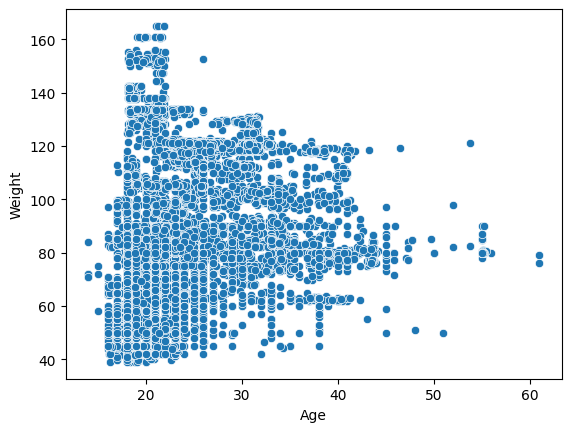

In [ ]:
# Create a scatter plot of Age vs. Weight
sns.scatterplot(data_train, x='Age', y='Weight')
plt.show()



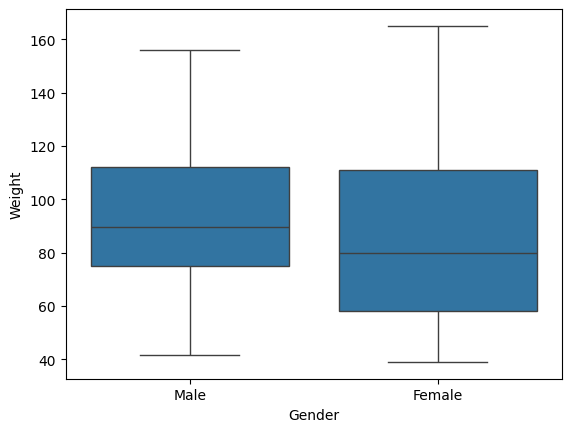

In [ ]:
# Create a box plot of Weight for each value of Gender
sns.boxplot(data_train, x='Gender', y='Weight')
plt.show()

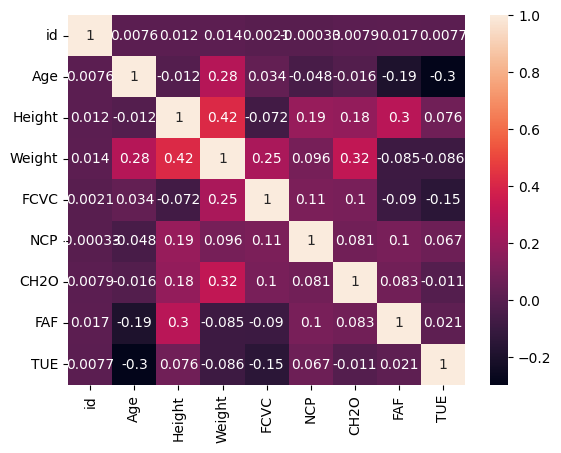

In [ ]:
# Create a heat map of the correlation between each pair of features
corr = data_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

3. Data PreProcessing¶


3.1 Data Concatenation ¶


In [ ]:
#concat the obj and the numeric features
train_data = pd.concat([train_obj , train_numeric], axis=1)

In [ ]:
train_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [ ]:
#concat the obj and the numeric features in the testing data
data_test = pd.concat([test_obj , test_numeric], axis=1)

In [ ]:
data_test.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069


3.2 Data Scaling¶


In [ ]:
sc = StandardScaler()
train_data['Age']= sc.fit_transform(train_data[['Age']])
train_data['Weight']= sc.fit_transform(train_data[['Weight']])

In [ ]:
train_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,20753,0.227725,1.766626,0.996987,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,20754,-1.027052,1.710000,-1.436296,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,20755,-0.657669,1.819557,0.670717,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,20756,1.760067,1.700000,-0.165574,2.671238,1.971472,2.144838,0.000000,0.973834


3.3 Data Splitting¶


In [ ]:
x = train_data.drop(['NObeyesdad','id'], axis =1)
y = train_data['NObeyesdad']

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x , y ,test_size=0.25 ,random_state=44,shuffle=True)

In [ ]:
print ('number of rows in the x train is', x_train.value_counts().sum())
print ('number of rows in the x test is', x_test.value_counts().sum())
print ('number of rows in the y train is', y_train.value_counts().sum())
print ('number of rows in the y test is', y_test.value_counts().sum())

number of rows in the x train is 15568
number of rows in the x test is 5190
number of rows in the y train is 15568
number of rows in the y test is 5190


4. Building the Models (Algorithms)¶


In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model4 = GaussianNB()
model5 = SVC()
model6 = XGBClassifier()
model7 = KNeighborsClassifier()

4.1 Logistic Regression Model




In [ ]:
model1 = LogisticRegression(C=10, penalty='l1', solver='saga')
model1 = model1.fit(x_train,y_train)


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
print (classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       752
           1       0.74      0.77      0.76       724
           2       0.83      0.78      0.80       750
           3       0.95      0.95      0.95       813
           4       1.00      0.99      0.99      1024
           5       0.58      0.68      0.63       519
           6       0.62      0.65      0.64       608

    accuracy                           0.83      5190
   macro avg       0.81      0.81      0.81      5190
weighted avg       0.84      0.83      0.83      5190



In [ ]:
print ('the model accuracy is', accuracy_score(y_test, y_pred)* 100 ,'%')


the model accuracy is 82.83236994219652 %


In [ ]:
#Define Function to apply to all the Models
def pred(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print ('the model accuracy is', accuracy_score(y_test, y_pred)* 100 ,'%')
  print (classification_report(y_pred , y_test))


4.2 RandomForestClassifier Model

In [ ]:
model2 = RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
model2 = model2.fit(x_train,y_train)


In [ ]:
pred(model2)

the model accuracy is 87.80346820809248 %
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       665
           1       0.89      0.76      0.82       874
           2       0.86      0.88      0.87       682
           3       0.97      0.97      0.97       817
           4       1.00      1.00      1.00      1015
           5       0.62      0.84      0.72       453
           6       0.80      0.75      0.77       684

    accuracy                           0.88      5190
   macro avg       0.86      0.87      0.86      5190
weighted avg       0.89      0.88      0.88      5190



4.3 GradientBoostingClassifier Model

In [ ]:
# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [2, 4, 6, 8],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform grid search
# grid_search = GridSearchCV(model3, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # Print the best parameters
# print('The best parameters are:', grid_search.best_params_)

In [ ]:
model3 = GradientBoostingClassifier()
model3 = model3.fit(x_train,y_train)

In [ ]:
pred(model3)

the model accuracy is 89.94219653179191 %
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       682
           1       0.88      0.85      0.87       773
           2       0.87      0.89      0.88       684
           3       0.97      0.97      0.97       818
           4       1.00      1.00      1.00      1016
           5       0.74      0.81      0.77       555
           6       0.81      0.78      0.80       662

    accuracy                           0.90      5190
   macro avg       0.89      0.89      0.89      5190
weighted avg       0.90      0.90      0.90      5190



4.4 GaussianNB Model

In [ ]:
model4 = GaussianNB()
model4 = model4.fit(x_train,y_train)

In [ ]:
pred(model4)

the model accuracy is 65.47206165703275 %
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       824
           1       0.42      0.62      0.50       507
           2       0.63      0.37      0.47      1182
           3       0.92      0.73      0.81      1035
           4       1.00      0.95      0.97      1071
           5       0.26      0.57      0.36       277
           6       0.24      0.53      0.33       294

    accuracy                           0.65      5190
   macro avg       0.62      0.64      0.60      5190
weighted avg       0.74      0.65      0.68      5190



4.5 SVC Model

In [ ]:
model5 = SVC()
model5 = model5.fit(x_train,y_train)

In [ ]:
pred(model5)

the model accuracy is 84.47013487475915 %
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       736
           1       0.75      0.79      0.77       703
           2       0.83      0.81      0.82       725
           3       0.97      0.96      0.96       819
           4       1.00      0.99      1.00      1019
           5       0.62      0.71      0.66       532
           6       0.70      0.68      0.69       656

    accuracy                           0.84      5190
   macro avg       0.83      0.83      0.83      5190
weighted avg       0.85      0.84      0.85      5190



4.6 XGBClassifier Model

In [ ]:
# # Define the grid of hyperparameters to search
# param_grid = {
#     'max_depth': [2, 4, 6, 8],
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# # Perform grid search
# grid_search = GridSearchCV(model6, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # Print the best parameters
# print('The best parameters are:', grid_search.best_params_)

In [ ]:
model6 = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)
model6 = model6.fit(x_train,y_train)

In [ ]:
pred(model6)

the model accuracy is 90.21194605009633 %
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       670
           1       0.90      0.86      0.88       776
           2       0.86      0.90      0.88       672
           3       0.97      0.97      0.97       817
           4       1.00      1.00      1.00      1016
           5       0.76      0.81      0.78       572
           6       0.82      0.79      0.80       667

    accuracy                           0.90      5190
   macro avg       0.89      0.89      0.89      5190
weighted avg       0.90      0.90      0.90      5190



4.7 KNeighborsClassifier Model

In [ ]:
model7 = KNeighborsClassifier()
model7 = model7.fit(x_train,y_train)

In [ ]:
pred(model7)

the model accuracy is 76.6859344894027 %
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       688
           1       0.66      0.58      0.62       841
           2       0.79      0.70      0.74       784
           3       0.94      0.94      0.94       819
           4       1.00      0.99      1.00      1020
           5       0.43      0.55      0.48       471
           6       0.57      0.65      0.61       567

    accuracy                           0.77      5190
   macro avg       0.74      0.74      0.74      5190
weighted avg       0.78      0.77      0.77      5190



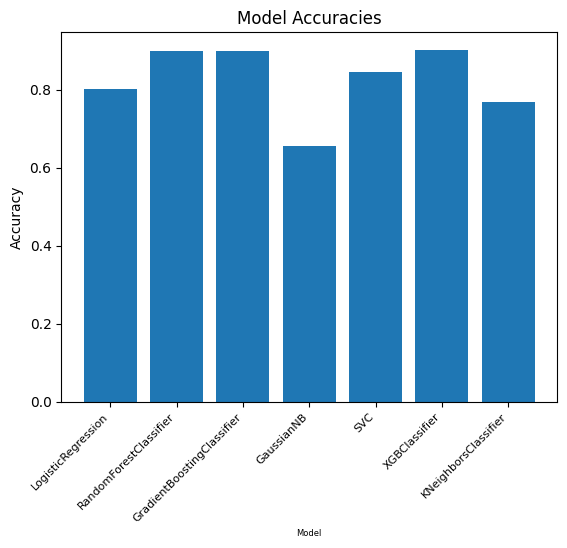

In [ ]:
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB(), SVC(),XGBClassifier(), KNeighborsClassifier()]

scores = []
for model in models:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)

plt.bar([model.__class__.__name__ for model in models], scores)
plt.xlabel('Model' , fontsize=6)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels([model.__class__.__name__ for model in models], fontsize=8)

plt.savefig('model_accuracies.png')
plt.show()

the XGBClassifier model achieved the highest accuracy, with an accuracy of 90%

5. Prediction on the test data¶


In [ ]:
test_x = data_test.drop('id', axis = 1)

In [ ]:
test_x

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,0,0,1,2,0,0,2,3,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,0,0,1,1,0,0,2,3,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,1,1,1,2,0,0,3,3,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


Model 6

In [ ]:
pred_x = model6.predict(test_x)

In [ ]:
submission = pd.DataFrame({'id': data_test['id'], 'NObeyesdad': pred_x})


In [ ]:
train_y = data_train['NObeyesdad']
La.fit(train_y)

# Inverse transform the predicted values
submission['NObeyesdad'] = La.inverse_transform(pred_x)

In [ ]:
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Obesity_Type_II
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III
...,...,...
13835,34593,Obesity_Type_II
13836,34594,Obesity_Type_III
13837,34595,Obesity_Type_II
13838,34596,Obesity_Type_II


In [ ]:
submission.to_csv('submission.csv', index = False)

Model 3

In [ ]:
pred_x_2 = model3.predict(test_x)

In [ ]:
submission_2 = pd.DataFrame({'id': data_test['id'], 'NObeyesdad': pred_x_2})


In [ ]:
train_y = data_train['NObeyesdad']
La.fit(train_y)

# Inverse transform the predicted values
submission_2['NObeyesdad'] = La.inverse_transform(pred_x_2)

In [ ]:
submission_2.to_csv('submission_2.csv', index = False)